In [2]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [4]:
df_explode = df.explode('job_skills')
df_explode_Data_Analyst = df_explode[df_explode['job_title_short'] == 'Data Analyst']
df_explode_Data_Analyst

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [5]:
df_final = df_explode_Data_Analyst.pivot_table(index='job_posted_month', columns='job_skills', aggfunc= 'size')
df_final

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
2,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
3,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
4,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
5,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
6,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
7,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
8,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
9,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [6]:
df_final.loc['Total'] = df_final.sum()
df_final

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
2,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
3,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
4,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
5,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
6,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
7,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
8,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
9,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [7]:
sorted_skills = df_final.loc['Total'].sort_values(ascending= False)
sorted_skills

job_skills
sql          92428.0
excel        66860.0
python       57190.0
tableau      46455.0
power bi     39380.0
              ...   
esquisse         1.0
suse             1.0
capacitor        1.0
chainer          1.0
msaccess         1.0
Name: Total, Length: 235, dtype: float64

In [8]:
sorted_skills = sorted_skills.head(5).index
sorted_skills

Index(['sql', 'excel', 'python', 'tableau', 'power bi'], dtype='object', name='job_skills')

In [9]:
import calendar
df_final = df_final[sorted_skills]
df_final

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0
2,7947.0,5772.0,4751.0,3936.0,3307.0
3,7868.0,5675.0,4741.0,4051.0,3176.0
4,7553.0,5496.0,4557.0,3776.0,3106.0
5,6617.0,4773.0,4070.0,3245.0,2695.0
6,7584.0,5724.0,4707.0,3812.0,3275.0
7,7687.0,5513.0,4831.0,3928.0,3350.0
8,8823.0,6482.0,5576.0,4533.0,3859.0
9,6829.0,4886.0,4229.0,3446.0,3118.0


In [10]:
df_final = df_final.drop('Total')
df_final

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0
2,7947.0,5772.0,4751.0,3936.0,3307.0
3,7868.0,5675.0,4741.0,4051.0,3176.0
4,7553.0,5496.0,4557.0,3776.0,3106.0
5,6617.0,4773.0,4070.0,3245.0,2695.0
6,7584.0,5724.0,4707.0,3812.0,3275.0
7,7687.0,5513.0,4831.0,3928.0,3350.0
8,8823.0,6482.0,5576.0,4533.0,3859.0
9,6829.0,4886.0,4229.0,3446.0,3118.0


In [11]:
df_final = df_final.reset_index()
df_final

job_skills,job_posted_month,sql,excel,python,tableau,power bi
0,1,11336.0,8170.0,6606.0,5596.0,4285.0
1,2,7947.0,5772.0,4751.0,3936.0,3307.0
2,3,7868.0,5675.0,4741.0,4051.0,3176.0
3,4,7553.0,5496.0,4557.0,3776.0,3106.0
4,5,6617.0,4773.0,4070.0,3245.0,2695.0
5,6,7584.0,5724.0,4707.0,3812.0,3275.0
6,7,7687.0,5513.0,4831.0,3928.0,3350.0
7,8,8823.0,6482.0,5576.0,4533.0,3859.0
8,9,6829.0,4886.0,4229.0,3446.0,3118.0
9,10,7474.0,5217.0,4693.0,3709.0,3340.0


In [12]:
import calendar
df_final['job_posted_month'] = df_final['job_posted_month'].apply(lambda x: calendar.month_name[x])
df_final

job_skills,job_posted_month,sql,excel,python,tableau,power bi
0,January,11336.0,8170.0,6606.0,5596.0,4285.0
1,February,7947.0,5772.0,4751.0,3936.0,3307.0
2,March,7868.0,5675.0,4741.0,4051.0,3176.0
3,April,7553.0,5496.0,4557.0,3776.0,3106.0
4,May,6617.0,4773.0,4070.0,3245.0,2695.0
5,June,7584.0,5724.0,4707.0,3812.0,3275.0
6,July,7687.0,5513.0,4831.0,3928.0,3350.0
7,August,8823.0,6482.0,5576.0,4533.0,3859.0
8,September,6829.0,4886.0,4229.0,3446.0,3118.0
9,October,7474.0,5217.0,4693.0,3709.0,3340.0


In [13]:
df_final = df_final.set_index('job_posted_month')
df_final

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
January,11336.0,8170.0,6606.0,5596.0,4285.0
February,7947.0,5772.0,4751.0,3936.0,3307.0
March,7868.0,5675.0,4741.0,4051.0,3176.0
April,7553.0,5496.0,4557.0,3776.0,3106.0
May,6617.0,4773.0,4070.0,3245.0,2695.0
June,7584.0,5724.0,4707.0,3812.0,3275.0
July,7687.0,5513.0,4831.0,3928.0,3350.0
August,8823.0,6482.0,5576.0,4533.0,3859.0
September,6829.0,4886.0,4229.0,3446.0,3118.0


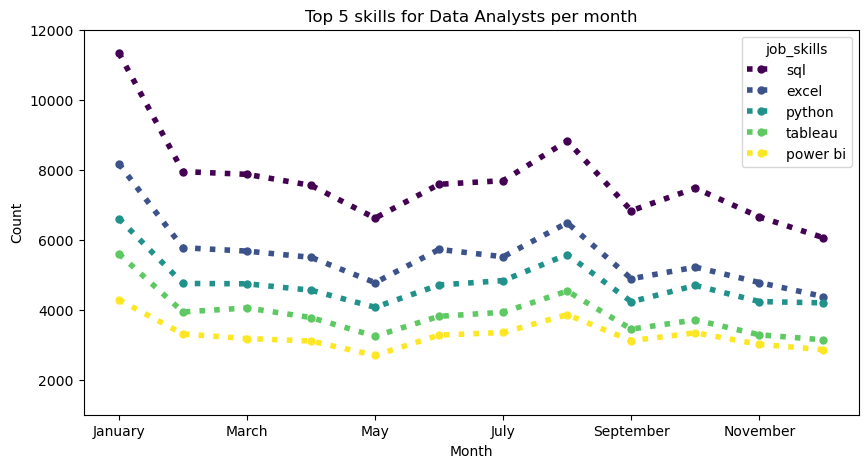

In [21]:
df_final.plot(
    kind = 'line',
    linewidth = 4,
    linestyle = ':',
    colormap = 'viridis',
    marker = 'o',
    markersize = 5,
    figsize = (10,5)
    )
plt.title('Top 5 skills for Data Analysts per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.ylim(1000, 12000)
plt.show()